# Lab 3: Feature selection

# To Do:
## Task 0: Execute each cell sequentially and ensure comprehension of the code in each.
## Task 1: Apply the same code to the diabetes dataset. Remember to adjust the evaluation method since the target variable is continuous.
## Task 2: Using the custom_rfe function, implement forward feature selection (custom_fss).

## Linear regression model

Regression analyzes connections between variables, such as examining how employee salaries are influenced by factors like experience, education level, job role, and location within a company. 

Let's begin with the fundamental concept of linear regression, which involves fitting a straight line to our data. This linear model takes the form:

$$ y = a_0 + a_1 x_1 + a_2 x_2 + ... $$

Here, $a_1$ $a_2$ $...$ represents the slopes and $a_0$ represents the intercept.



## Data Exploration

In [ ]:
# importing required libraries
import matplotlib.pylab as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import datasets


In [ ]:
iris = datasets.load_iris() # load data

In [ ]:
iris.data.shape # feature matrix shape

In [ ]:
iris.target.shape # target vector shape

In [ ]:
iris.feature_names # column names

In [ ]:
import pandas as pd

# converting data to pandas dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])


In [ ]:
df.head()

In [ ]:
import seaborn as sns

# Plot scatterplot of the Iris dataset
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle("Scatterplot of Iris Dataset", y=1.02)
plt.show()

## Modeling

### Using one feature at a time

In [ ]:
X = df['sepal length (cm)'].values.reshape(-1,1)
y = df['target'].values

Linear Regression assumes the following model: 
 
 $y = X\beta + c + \epsilon$
 
 X data <br />
 $\beta$ coefficients <br />
 c intercept <br />
 $\epsilon$ error, cannot explained by model <br />
 y target <br />
 
 Using scikit-learn, linear regression is very easy:

In [ ]:
from sklearn.model_selection import train_test_split

help(train_test_split)

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line, as shown in  following:

In [ ]:
from sklearn.model_selection import train_test_split
# Sperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
help(LinearRegression)

In [ ]:
## build the linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

After fitting the model, you can play it in the folowing ways:

In [ ]:
model.coef_ # Get the coefficients, beta

In [ ]:
model.intercept_ # Get the intercept, c

In [ ]:
y_pred= model.predict(X_test)
# Predict unkown data
y_pred



### plot actual data vs predicted line:

In [ ]:
# Plot scatterplot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Species')
plt.title('Linear Regression on Iris Dataset')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Convert predicted values to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Using second feature:

In [ ]:
X = df['sepal width (cm)'].values.reshape(-1,1)
y = df['target'].values

# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




model = LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# Predict unkown data
y_pred


# Convert predicted values to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




### Using third feature:

In [ ]:
X = df['petal length (cm)'].values.reshape(-1,1)
y = df['target'].values

# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





model = LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# Predict unkown data
y_pred


# Convert predicted values to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Using fourth feature:

In [ ]:
X = df['petal width (cm)'].values.reshape(-1,1)
y = df['target'].values

# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# Predict unkown data
y_pred


# Convert predicted values to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Using all features:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Select features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_int, average='weighted')
print("F1-score with all features:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## bruteforce search


In [ ]:
from itertools import combinations
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def brute_force_feature_selection(X, y, model, tolerance=0.95):
    """
    Perform brute-force feature selection by iterating over all possible combinations of features.
    
    Parameters:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target variable.
        model: Model to be used for training.
        tolerance (float): Tolerance level for accuracy.
        
    Returns:
        pandas.DataFrame: Table with used features and accuracy.
    """
    num_features = X.shape[1]
    feature_names = [f'Feature {i+1}' for i in range(num_features)]
    results = []
    
    # Iterate over all possible combinations of features
    for r in range(1, num_features+1):
        for combination in combinations(range(num_features), r):
            X_subset = X[:, combination]
            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, np.round(y_pred).astype(int))
            # Append results to the list
            results.append([list(combination), accuracy])
    
    # Create DataFrame
    results_df = pd.DataFrame(results, columns=['Used Features', 'Accuracy'])
    return results_df

# Example usage:
iris = load_iris()
X = iris.data
y = iris.target
model = LinearRegression()
results_df = brute_force_feature_selection(X, y, model, tolerance=0.95)

sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
sorted_results_df


### Using recursive feature elimination:

the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable.

Then, the least important features are pruned from current set of features.

That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Recursive Feature Elimination (RFE) from scratch with accuracy
def custom_rfe(model, X_train, X_test, y_train, y_test):
    num_features = X_train.shape[1]
    selected_features = list(range(num_features))
    best_accuracy = 0
    best_feature_set = selected_features.copy()
    while len(selected_features) > 1:
        worst_feature = None
        min_coefficient = float('inf')
        for feature in selected_features:
            features_subset = selected_features.copy()
            features_subset.remove(feature)
            X_train_subset = X_train[:, features_subset]
            X_test_subset = X_test[:, features_subset]
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            accuracy = accuracy_score(y_test, np.round(y_pred).astype(int))
            print("features_subset : ", features_subset , "accuracy: ",accuracy)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature_set = features_subset.copy()
            coefficients = np.abs(model.coef_)
            if np.min(coefficients) < min_coefficient:
                min_coefficient = np.min(coefficients)
                worst_feature = feature
        print("worst_feature: ", worst_feature)
        selected_features.remove(worst_feature)
    return best_feature_set

# Perform RFE to select features
selected_features = custom_rfe(model, X_train, X_test, y_train, y_test)
print("Selected Features:", selected_features)

# Transform the training and testing datasets to include only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the Linear Regression model with the selected features
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Calculate Accuracy
accuracy = accuracy_score(y_test, np.round(y_pred).astype(int))
print("Accuracy:", accuracy)

### using the python predefined function:

In [ ]:
from sklearn.feature_selection import RFE

help(RFE)

Selected Features: Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
F1-score with selected features: 1.0


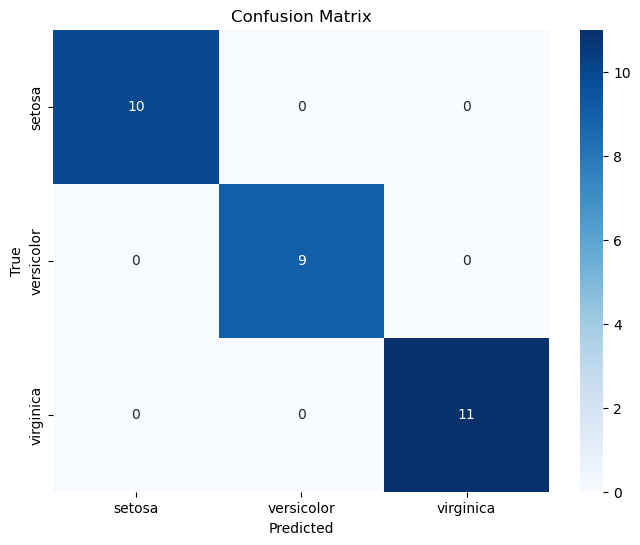

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Select features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
model = LinearRegression()

# Perform Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train model using selected features
model.fit(X_train[selected_features], y_train)

# Make predictions
y_pred = model.predict(X_test[selected_features])

# Convert predictions to integer (rounding to nearest)
y_pred_int = np.round(y_pred).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_int, average='weighted')
print("F1-score with selected features:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_int)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## You have successfully finished Task0.
## Now you can make changes to do Task 1.
## Task 1: Apply the same code to the diabetes dataset. Remember to adjust the evaluation method since the target variable is continuous.


In [ ]:
## Reproduce the same notebook using diabete dataset
from sklearn.datasets import load_diabetes
diabets = load_diabetes()

In [ ]:
diabets.target[:10]